# Ames Housing Data and Kaggle Challenge
## EDA
***

*Import libraries and read in data:*

In [1]:
#Imports:

import numpy as np                # import numpy
import pandas as pd               # import pandas

import matplotlib.pyplot as plt   # import matplotlib
import seaborn as sns             # import seaborn

%matplotlib inline

In [2]:
# Read in the train and test data files and replaced all NaNs with 'NA'
train = pd.read_csv('../datasets/train_clean.csv', na_filter = False,)
test  = pd.read_csv('../datasets/test_clean.csv', na_filter = False)

In [3]:
# Verifying all nulls are gone
train.isnull().sum().sum()

0

In [4]:
# Fix type for MS SubClass and Garage Columns
train['MS SubClass'] = train['MS SubClass'].astype(str)
test['MS SubClass'] = test['MS SubClass'].astype(str)

In [5]:
# drop 'Unnamed: 0' column that was created when we saved the cleaned dataset (old index)
train.drop(columns = 'Unnamed: 0', inplace = True)
test.drop(columns = 'Unnamed: 0', inplace = True)

In [6]:
# View DataFrame
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,80.991927,13517,1,NA,IR1,Lvl,...,0,0,0,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.000000,11492,1,NA,IR1,Lvl,...,0,0,0,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.000000,7922,1,NA,Reg,Lvl,...,0,0,0,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.000000,9802,1,NA,Reg,Lvl,...,0,0,0,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.000000,14235,1,NA,IR1,Lvl,...,0,0,0,NA,NA,0,3,2010,WD,138500


### Correlations
***

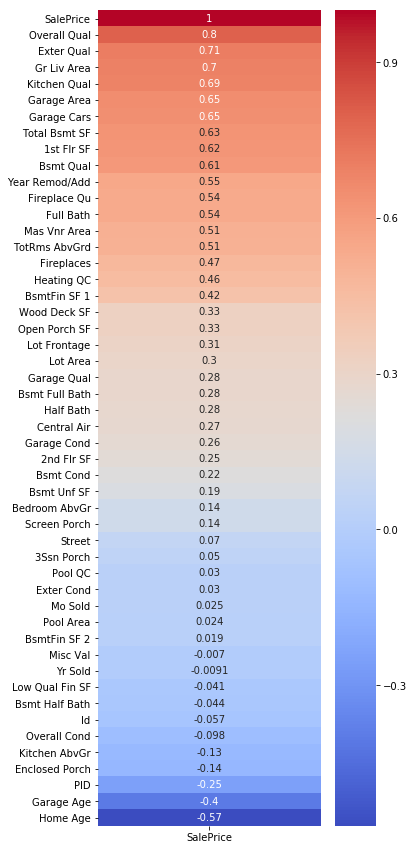

In [7]:
# Correlation heatmap looking at numerical feature vs SalePrice (absolute value of correlation)
plt.figure(figsize=(5,15))
sns.heatmap(train.corr()[['SalePrice']].sort_values('SalePrice', ascending=False),
            annot=True,
            cmap='coolwarm');

Observations:
- Overall Quality has the highest correlation to Sale Price
- Many of the quality features are now highly correlated to Sale Price
- Garage Area and Garage Cars are highly correlated to Sale Price

In [8]:
# Find top correlated numerical features (abs(correlation) > 0.3)
top_features = abs(train.corr()['SalePrice'])[abs(train.corr()['SalePrice']) > 0.30].sort_values(ascending = False).keys()
print('Number of Features where corr > 0.3: ', len(top_features))
top_features = list(top_features)
top_features

Number of Features where corr > 0.3:  23


['SalePrice',
 'Overall Qual',
 'Exter Qual',
 'Gr Liv Area',
 'Kitchen Qual',
 'Garage Area',
 'Garage Cars',
 'Total Bsmt SF',
 '1st Flr SF',
 'Bsmt Qual',
 'Home Age',
 'Year Remod/Add',
 'Fireplace Qu',
 'Full Bath',
 'Mas Vnr Area',
 'TotRms AbvGrd',
 'Fireplaces',
 'Heating QC',
 'BsmtFin SF 1',
 'Garage Age',
 'Wood Deck SF',
 'Open Porch SF',
 'Lot Frontage']

### Histograms (Distributions)
***

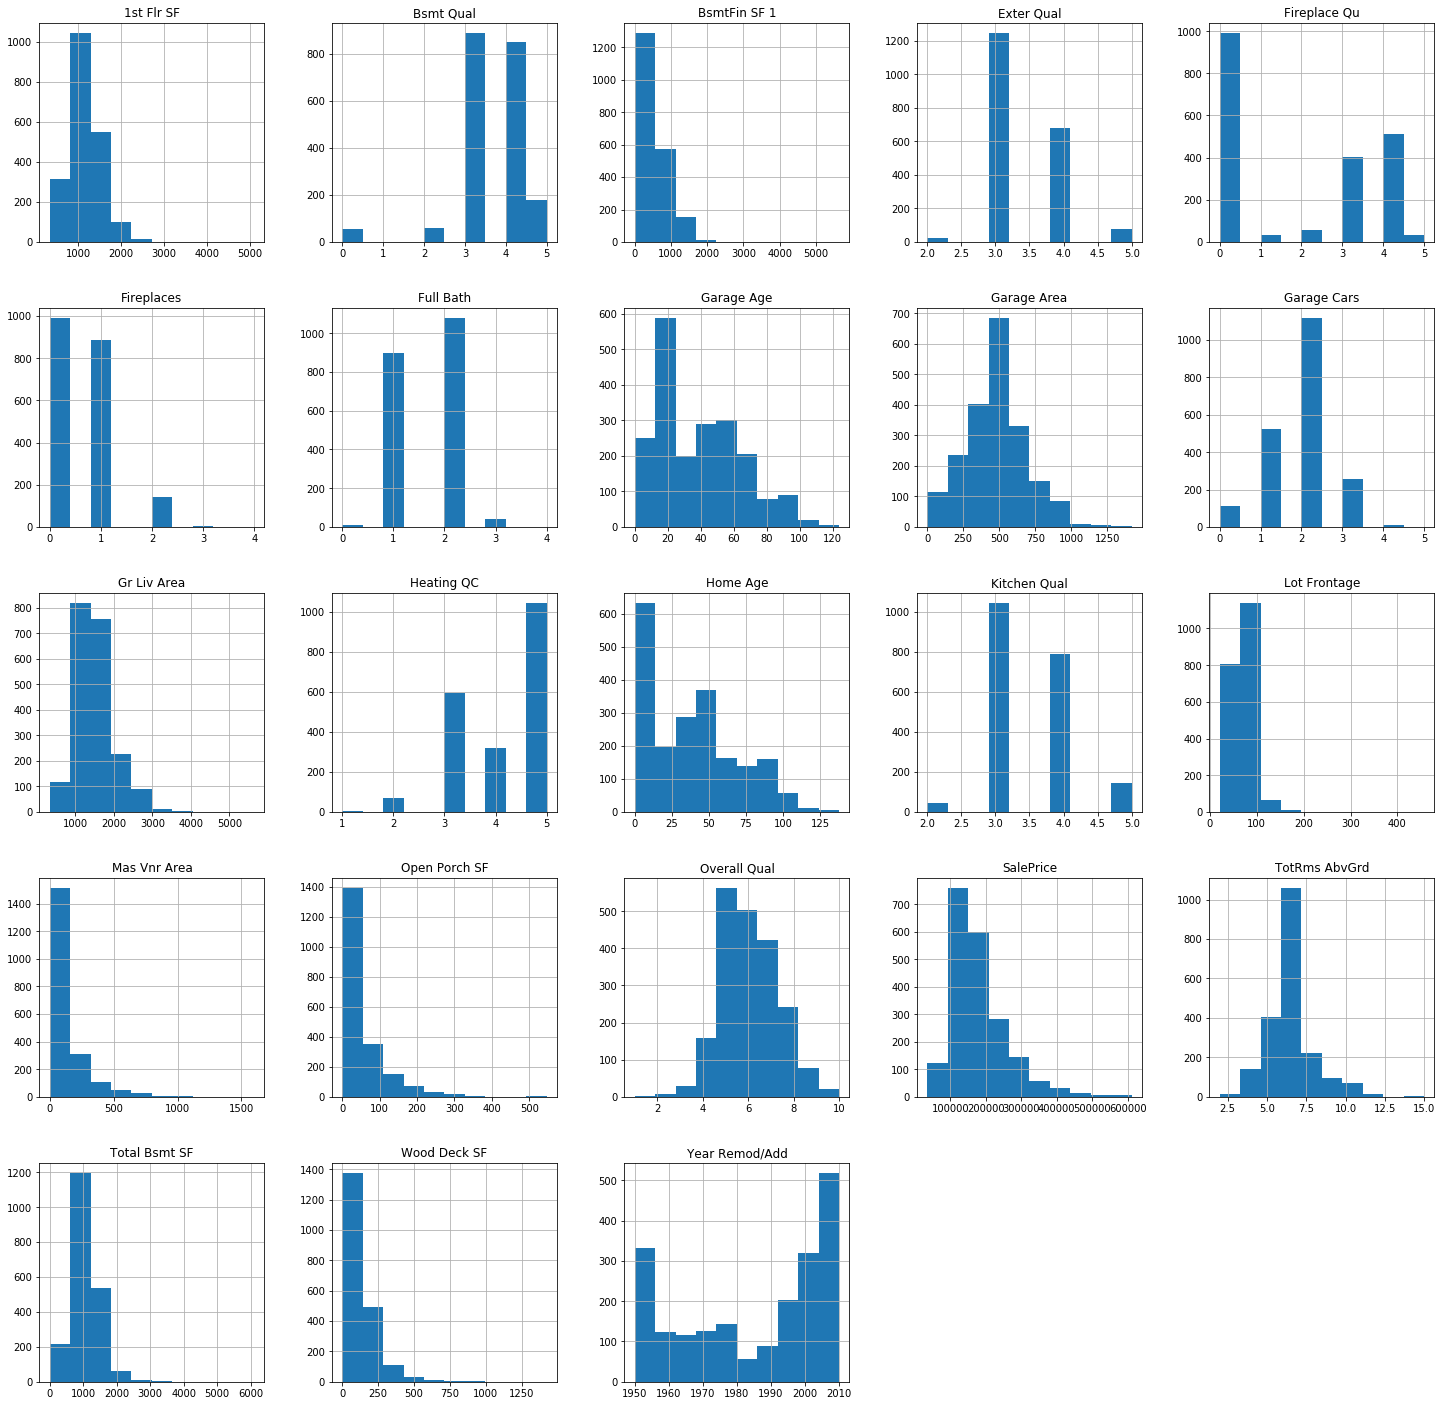

In [9]:
# Look at distributions of all top features
train[top_features].hist(figsize=(25,25)); # plots histogram for every column in dataframe

Observations:
- Garage Area and Garage Cars appear normally distributed
- Year Built and Year Remod/Add are skewed left
- Most of the SF features have a positive skew

In [10]:
# Look at distribution by neighborhoos

# Getting average sale price per neighborhood (and sort highest to lowerst)
neighbor_avg = train[['Neighborhood', 'SalePrice']].groupby('Neighborhood').mean().sort_values('SalePrice', ascending = False)

In [11]:
# Getting max sale price per neighborhood and sort highest to lowerst)
neighbor_max = train[['Neighborhood', 'SalePrice']].groupby('Neighborhood').max().sort_values('SalePrice', ascending = False)

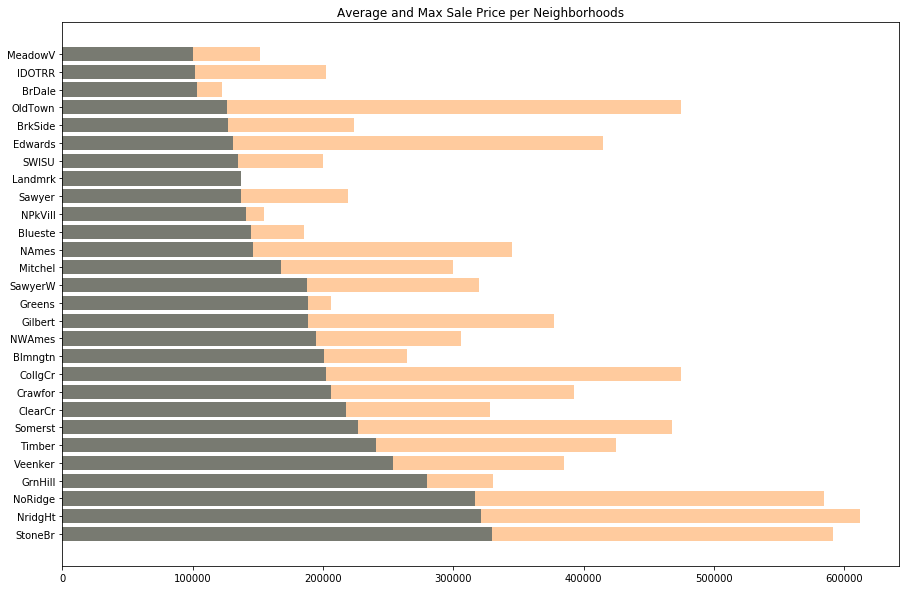

In [12]:
# Plotting how neighborhood affects Sale Price
plt.figure(figsize=(15,10))

plt.barh(neighbor_avg.index, neighbor_avg['SalePrice'])               # average = gray bar
plt.title('Average and Max Sale Price per Neighborhoods');

plt.barh(neighbor_max.index, neighbor_max['SalePrice'], alpha = 0.4); # max = orange bars

Observations:
- The top 3 neighborhoods with the highest average sale price, also have the two 3 max sale price (StoneBr, NridgHt, NoRidge)
- old Town and CollgCr have high max prices, but much lower average prices

In [13]:
# Get neighborhoods in each category (28/7 = 4 in each category...asign values 1-7)
# Make a new column with newly mapped variables
# Can do this because there is a linear relationship between neighborhood and sale price
neighborhood_dict = {'StoneBr': 7, 'NridgHt': 7, 'NoRidge': 7, 'GrnHill': 7,
                     'Veenker': 6, 'Timber': 6,'Somerst': 6, 'ClearCr': 6, 
                     'Crawfor': 5, 'CollgCr': 5, 'Blmngtn': 5, 'NWAmes': 5,
                     'Gilbert': 4, 'Greens': 4, 'SawyerW': 4, 'Mitchel': 4, 
                     'NAmes': 3, 'Blueste': 3,'NPkVill': 3, 'Sawyer': 3, 
                     'Landmrk': 2, 'SWISU': 2, 'Edwards': 2, 'BrkSide': 2,
                     'OldTown': 1, 'BrDale': 1, 'IDOTRR': 1, 'MeadowV': 1}

In [14]:
# Create new column in train and test
train['Neighborhood Quality'] = train['Neighborhood'].map(neighborhood_dict)
test['Neighborhood Quality'] = test['Neighborhood'].map(neighborhood_dict)

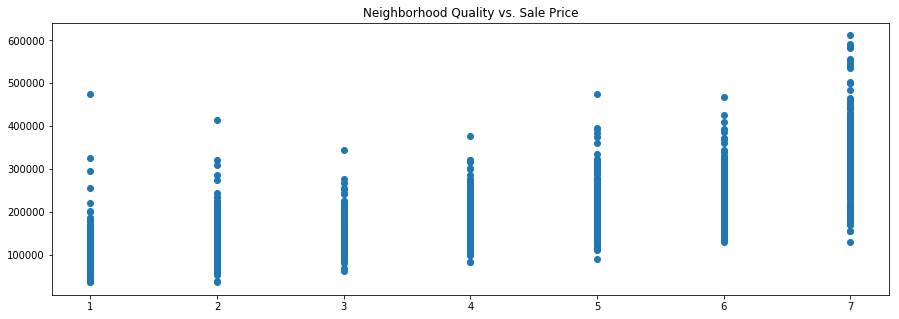

In [15]:
# Plot new column vs Sale Price
plt.figure(figsize=(15,5))
plt.scatter(train['Neighborhood Quality'], train['SalePrice'])
plt.title('Neighborhood Quality vs. Sale Price');

In [16]:
# Correlation between new column and sale price
np.corrcoef(train['Neighborhood Quality'], train['SalePrice'])[0][1]

0.7137835012688785

Observations: Neighborhood Quality and Sale Price are positively correlated

In [17]:
# # Drop neighborood column, since we now have neighborhood quality column
# train.drop(columns='Neighborhood', inplace = True)
# test.drop(columns='Neighborhood', inplace = True)

In [18]:
# Add neighborhood quality to top features list
top_features.append('Neighborhood Quality')

### Describe our Data
***

In [19]:
# look at subset data to make sure everything looks as expected
train[top_features].describe().T

,count,mean,std,min,25%,50%,75%,max
SalePrice,2026.0,181070.601678,79002.538381,34900.0,129500.00,161000.000000,213497.50,611657.000000
Overall Qual,2026.0,6.104146,1.418576,1.0,5.00,6.000000,7.00,10.000000
Exter Qual,2026.0,3.400790,0.586498,2.0,3.00,3.000000,4.00,5.000000
Gr Liv Area,2026.0,1498.145114,501.237222,334.0,1127.25,1442.000000,1728.00,5642.000000
Kitchen Qual,2026.0,3.511846,0.663777,2.0,3.00,3.000000,4.00,5.000000
Garage Area,2026.0,472.780355,216.145072,0.0,316.25,480.000000,576.00,1418.000000
Garage Cars,2026.0,1.772952,0.765799,0.0,1.00,2.000000,2.00,5.000000
Total Bsmt SF,2026.0,1056.580454,449.541148,0.0,793.00,994.000000,1315.50,6110.000000
1st Flr SF,2026.0,1163.989635,395.831160,334.0,880.00,1092.500000,1402.75,5095.000000
Bsmt Qual,2026.0,3.483712,0.897723,0.0,3.00,4.000000,4.00,5.000000


### Look for Outliers (Pairplots, Boxplots, and Scatterplots)
***

In [20]:
# How many features are in the top_features list? 24
len(top_features)

24

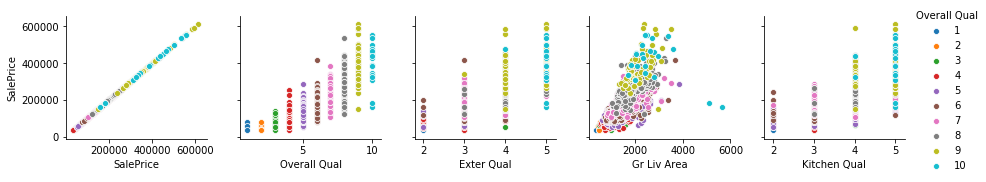

In [21]:
# Plot all top features in a scatter plot against Sale Price using Overall Qual as hue
sns.pairplot(train[top_features], 
             x_vars= top_features[:5], 
             y_vars='SalePrice',
             hue = 'Overall Qual');

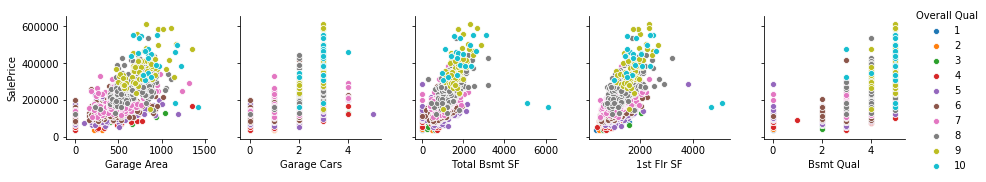

In [22]:
sns.pairplot(train[top_features], 
             x_vars= top_features[5:10], 
             y_vars='SalePrice',
             hue = 'Overall Qual');

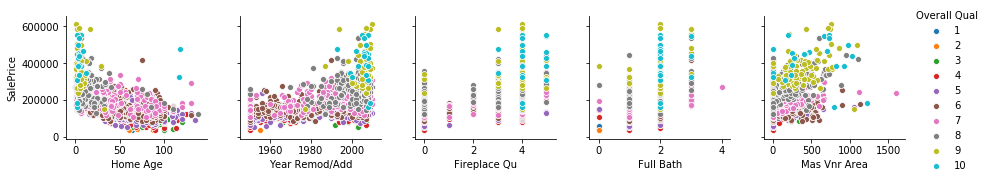

In [23]:
sns.pairplot(train[top_features], 
             x_vars= top_features[10:15], 
             y_vars='SalePrice',
             hue = 'Overall Qual');

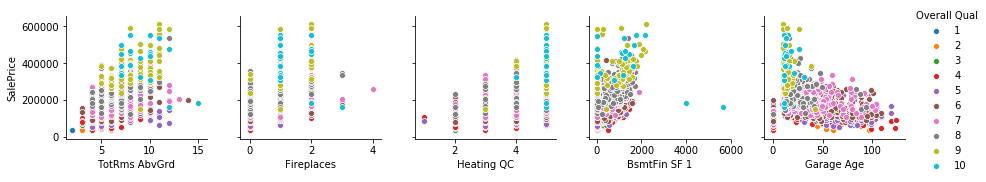

In [24]:
sns.pairplot(train[top_features], 
             x_vars= top_features[15:20], 
             y_vars='SalePrice', 
             hue = 'Overall Qual');

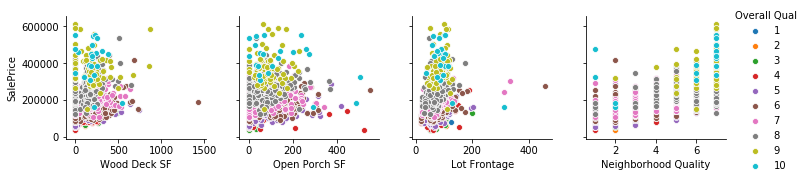

In [25]:
sns.pairplot(train[top_features], 
             x_vars= top_features[20:], 
             y_vars='SalePrice', 
             hue = 'Overall Qual');

Observations:
- Variables with strong linear relationship: Overall Quality, Exter Qual, Gr Liv area, Kitchn Qual, Garage Area, Total Bsmt SF, 1st Flr SF, and Neighborhood Quality
- Garage Cars, Bsmt Qual, Full Bath, Fireplace Qu, TotRmsAbvGtd, Fireplaces, Heating QC, and Neighborhood Quality are discrete numerical variables (0, 1, 2, 3, etc.)
- Higher Kitchen Quality, Higher Basement Quality, Newer Homes, and More Rms Above Ground appear to have better Overall Quality
- There appear to be a few outliers in each plot

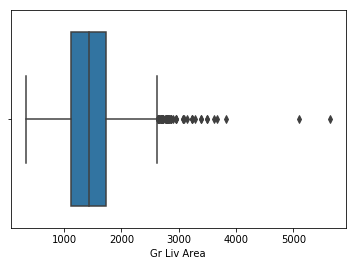

In [26]:
# Looks like in many cases there are a few outliers (especailly in terms of SF)
# Look at outlies for 'Gr Liv Area' (Above Ground Square Feet)
sns.boxplot(train['Gr Liv Area']);

Observation: There are many outliers to the right, but two outliers very far to the right

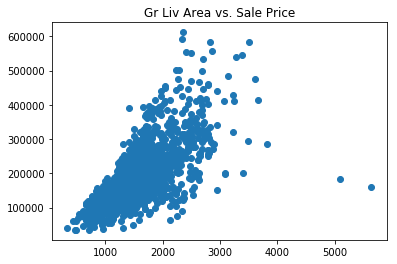

In [27]:
# Plot scatter plots to look at outliers
plt.scatter(train['Gr Liv Area'], train['SalePrice'])
plt.title('Gr Liv Area vs. Sale Price');

Observation: these outliers with large square footage have an unusually low Sale Price

In [28]:
# Check outliers...how to handle these?
train[train['Gr Liv Area'] > 4000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Neighborhood Quality
947,1499,908154235,60,RL,313.0,63887,1,NA,IR3,Bnk,...,480,4,NA,NA,0,1,2008,New,160000,2
1861,2181,908154195,20,RL,128.0,39290,1,NA,IR1,Bnk,...,0,0,NA,Elev,17000,10,2007,New,183850,2


In [29]:
# Removing these outliers will make my data more normal and slightly less heteroskedistic
train.drop(labels=[947, 1861], inplace=True)

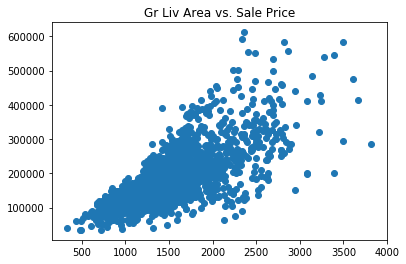

In [30]:
# Plot with newly removed outliers
plt.scatter(train['Gr Liv Area'], train['SalePrice'])
plt.title('Gr Liv Area vs. Sale Price');

In [31]:
# Look at outliers on Lot Frontag
train[train['Lot Frontage'] > 300][['Lot Frontage', 'Lot Area', 'Lot Shape', 'Gr Liv Area', 'SalePrice']]

,Lot Frontage,Lot Area,Lot Shape,Gr Liv Area,SalePrice
462,457.136616,159000,IR2,2144,277000
684,336.019733,115149,IR2,1824,302000
1319,313.000000,27650,IR2,2069,242000


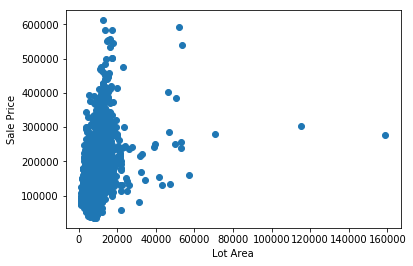

In [32]:
# Seems like a lot of lot area for a relatively low price in the first two rows
plt.scatter(train['Lot Area'], train['SalePrice'])
plt.xlabel('Lot Area')
plt.ylabel('Sale Price');

In [33]:
# There are a few main outliers. Same two rows as above
train[train['Lot Area'] > 100000][['Lot Frontage', 'Lot Area', 'Lot Shape', 'Gr Liv Area', 'SalePrice']]

,Lot Frontage,Lot Area,Lot Shape,Gr Liv Area,SalePrice
462,457.136616,159000,IR2,2144,277000
684,336.019733,115149,IR2,1824,302000


In [34]:
# Remove these rows
train.drop(labels = [462, 684], inplace = True)

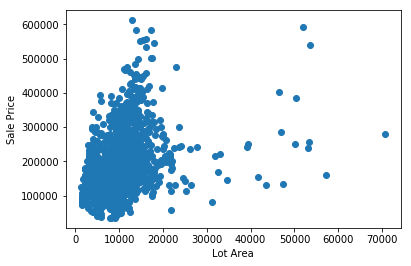

In [35]:
plt.scatter(train['Lot Area'], train['SalePrice'])
plt.xlabel('Lot Area')
plt.ylabel('Sale Price');

### Feature Exploration
***

In [36]:
# What does 'Gr Liv Area' encompass?? (Above Ground SF)
sf_columns = [col for col in train.columns if 'sf' in col.lower()]
sf_columns.append('Gr Liv Area')

In [37]:
sf = train.copy()[sf_columns]

In [38]:
sf['Total SF'] = sf['1st Flr SF'] + sf['2nd Flr SF'] + sf['Low Qual Fin SF']
sf['Total SF - Gr Liv Area'] = sf['Total SF'] - sf['Gr Liv Area']
sf[sf['Total SF - Gr Liv Area'] != 0]

,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Wood Deck SF,Open Porch SF,Gr Liv Area,Total SF,Total SF - Gr Liv Area


Observation: Gr Liv Area = 1st Flr SF + 2nd Flr SF + Low Qual Fin SF
- I think it would be helpful to make a new column of 1st Flr SF + 2nd Flor SF that encompassess all finished above ground square foot

In [39]:
# Make new columns for Above Ground SF
train['Above Ground SF'] = train['1st Flr SF'] + train['2nd Flr SF']
test['Above Ground SF'] = test['1st Flr SF'] + test['2nd Flr SF']

In [40]:
# Slightly higher correlation (not much) with Above Ground SF and Sale Price
train[['Above Ground SF', 'Gr Liv Area', 'SalePrice']].corr()['SalePrice']

Above Ground SF    0.728805
Gr Liv Area        0.719911
SalePrice          1.000000
Name: SalePrice, dtype: float64

In [41]:
# Look at bath columns and correlations between price
bath_columns = [col for col in train.columns if 'bath' in col.lower()]
bath_columns.append('SalePrice')
bath_columns

['Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'SalePrice']

In [42]:
train[bath_columns].head()

,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,SalePrice
0,0.0,0.0,2,1,130500
1,1.0,0.0,2,1,220000
2,1.0,0.0,1,0,109000
3,0.0,0.0,2,1,174000
4,0.0,0.0,2,0,138500


Observation: full baths and half baths have the same weight an integer value, but are not worth the same
- For exaxmple: a full bath = 1 is not the same as a half bath = 1

In [43]:
# Bath column correlations
train[bath_columns].corr()['SalePrice']

Bsmt Full Bath    0.284346
Bsmt Half Bath   -0.046946
Full Bath         0.538497
Half Bath         0.280254
SalePrice         1.000000
Name: SalePrice, dtype: float64

In [44]:
# Create a column for all baths in the house weighting each component based on value (what makes correlation highest)
train['Baths'] = 0.65*train['Bsmt Full Bath'] + 0.20*train['Bsmt Half Bath'] + 1.05*train['Full Bath'] + 0.50*train['Half Bath']
test['Baths'] = 0.65*test['Bsmt Full Bath'] + 0.20*test['Bsmt Half Bath'] + 1.05*test['Full Bath'] + 0.50*test['Half Bath']

In [45]:
train[['Baths', 'SalePrice']].corr()['SalePrice']

Baths        0.64836
SalePrice    1.00000
Name: SalePrice, dtype: float64

In [46]:
# Look at basement features
basement_columns = [col for col in train.columns if 'bs' in col.lower()]
basement_columns.append('SalePrice')
basement_columns

['Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'SalePrice']

In [47]:
basement_columns.append('Low Qual Fin SF')

In [48]:
train[train['Low Qual Fin SF'] > 0][basement_columns].head()

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,SalePrice,Low Qual Fin SF
244,0,0,NA,NA,0.0,NA,0.0,0.0,0.0,0.0,0.0,68104,205
264,4,3,No,Unf,0.0,Unf,0.0,600.0,600.0,0.0,0.0,144152,80
314,3,3,No,Rec,360.0,Unf,0.0,360.0,720.0,0.0,0.0,128500,528
349,3,2,No,Unf,0.0,Unf,0.0,1013.0,1013.0,0.0,0.0,85000,513
375,3,3,No,Unf,0.0,Unf,0.0,755.0,755.0,0.0,0.0,104000,371


In [49]:
# BsmtFinType1: Quality of basement finished area
# BsmtFinSF1: Type 1 finished square feet
    # BsmtFinType1: Quality of basement finished area
    # GLQ Good Living Quarters
    # ALQ Average Living Quarters
    # BLQ Below Average Living Quarters
    # Rec Average Rec Room
    # LwQ Low Quality
    # Unf Unfinshed
    # NA No Basement

# Make a new columnc called 'Finished Basement' that takes all of these into acccount
#train[['BsmtFin Type 1', 'BsmtFin Sf 1']].

basement_mapping = { 'GLQ' : 6,
                    'ALQ' : 5,
                    'BLQ' : 4,
                    'Rec' : 3,
                    'LwQ' : 2,
                    'Unf' : 1,
                    'NA' : 0}

train['BsmtFin Type 1'] = train['BsmtFin Type 1'].map(basement_mapping)
train['BsmtFin Type 2'] = train['BsmtFin Type 2'].map(basement_mapping)
test['BsmtFin Type 1'] = test['BsmtFin Type 1'].map(basement_mapping)
test['BsmtFin Type 2'] = test['BsmtFin Type 2'].map(basement_mapping)

In [50]:
train['Finished Basement'] = (train['BsmtFin Type 1'] * train['BsmtFin SF 1']) + (train['BsmtFin Type 2'] * train['BsmtFin SF 2'])
test['Finished Basement'] = (test['BsmtFin Type 1'] * test['BsmtFin SF 1']) + (test['BsmtFin Type 2'] * test['BsmtFin SF 2'])

In [51]:
train[['Finished Basement', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Low Qual Fin SF']].head()

,Finished Basement,BsmtFin SF 1,BsmtFin SF 2,Low Qual Fin SF
0,3198.0,533.0,0.0,0
1,3822.0,637.0,0.0,0
2,4386.0,731.0,0.0,0
3,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0


In [52]:
train[['Finished Basement', 'BsmtFin Type 1', 'BsmtFin SF 1', 'SalePrice']].corr()['SalePrice']

Finished Basement    0.522911
BsmtFin Type 1       0.350164
BsmtFin SF 1         0.444545
SalePrice            1.000000
Name: SalePrice, dtype: float64

Observation: Finished Basement has higher correlation

In [53]:
# Make indicator for finished basement or not finished basement
train['Finished Bsmt YN'] = train['Finished Basement'].map(lambda x: 1 if x > 1 else 0)
test['Finished Bsmt YN'] = test['Finished Basement'].map(lambda x: 1 if x > 1 else 0)

In [54]:
# For all houses with basements how does sale price differ by finished basement vs. unfinished basement
basement = train[train['Bsmt Qual'] != 0][['Finished Bsmt YN', 'SalePrice']].groupby('Finished Bsmt YN').mean()
basement

,SalePrice
Finished Bsmt YN,
0,165625.197635
1,190436.335756


In [55]:
basement.to_csv('../datasets/basements.csv')

In [56]:
# Look at outdoor features - porch, deck, etc.
print([col for col in train.columns if 'porch' in col.lower()])
print([col for col in train.columns if 'deck' in col.lower()])

['Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch']
['Wood Deck SF']


In [57]:
outside_cols = [col for col in train.columns if 'porch' in col.lower()]
outside_cols.append('Wood Deck SF')

In [58]:
train[outside_cols].head()

,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Wood Deck SF
0,44,0,0,0,0
1,74,0,0,0,0
2,52,0,0,0,0
3,0,0,0,0,100
4,59,0,0,0,0


In [59]:
# Make a column for Outdoor_SF:
train['Outdoor SF'] = train['Open Porch SF'] + train['Wood Deck SF']
test['Outdoor SF'] = test['Open Porch SF'] + test['Wood Deck SF']

In [60]:
train[['Outdoor SF', 'Open Porch SF', 'Wood Deck SF', 'SalePrice']].corr()['SalePrice']

Outdoor SF       0.436541
Open Porch SF    0.331263
Wood Deck SF     0.328292
SalePrice        1.000000
Name: SalePrice, dtype: float64

Observation: combined Outdoor_SF is higher correlated than two separate

In [61]:
# Look at everything above ground
abvgrd_cols = [col for col in train.columns if 'abv' in col.lower()]
abvgrd_cols

['Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd']

In [62]:
train[abvgrd_cols].head()

,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd
0,3,1,6
1,4,1,8
2,3,1,5
3,3,1,7
4,3,1,6


In [63]:
# Look at quality features and make new column for 'Total Quality'
train['Total Quality'] = train['Overall Qual'] + train['Exter Qual'] + train['Bsmt Qual'] + train['Kitchen Qual']
test['Total Quality'] = test['Overall Qual'] + test['Exter Qual'] + test['Bsmt Qual'] + test['Kitchen Qual']

In [64]:
new_quality_cols = ['Total Quality', 'Overall Qual', 'Exter Qual', 'Bsmt Qual', 'Kitchen Qual', 'Garage Qual', 'SalePrice']
train[new_quality_cols].corr()['SalePrice']

Total Quality    0.829114
Overall Qual     0.802094
Exter Qual       0.714292
Bsmt Qual        0.609237
Kitchen Qual     0.692597
Garage Qual      0.283589
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [65]:
train[['Total Quality']].dtypes

Total Quality    int64
dtype: object

Observation: Total Quality is more highly correlated than any of the individual qualities

In [66]:
# See what numerical features would be best as interaction terms

# Remove all categorical columns from train and set to new dataframe
num_train = train[train._get_numeric_data().columns]

In [67]:
# Remove 'SalePrice'
num_train.drop(columns = 'SalePrice', inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [68]:
from itertools import combinations

In [69]:
# Iterate through random combinations of 2 features to find the ones that create the highest correlated 
# interaction feature with Sale Price
combos = list(combinations(num_train, 2))

best_interaction_terms = []

for predictor_set in combos:

    predictor_list = list(predictor_set)
    current_corr = np.corrcoef(train[predictor_list[0]] * train[predictor_list[1]], train['SalePrice'])[0][1]

    if current_corr > 0.87:
        print('Best Terms: ', predictor_set)
        print('Best Correlation: ', current_corr)
        print()

Best Terms:  ('Overall Qual', 'Gr Liv Area')
Best Correlation:  0.8726512766377205

Best Terms:  ('Overall Qual', 'Above Ground SF')
Best Correlation:  0.8763022195791164



/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Best Terms:  ('Gr Liv Area', 'Total Quality')
Best Correlation:  0.8816884176701557

Best Terms:  ('Above Ground SF', 'Total Quality')
Best Correlation:  0.8850208134006138



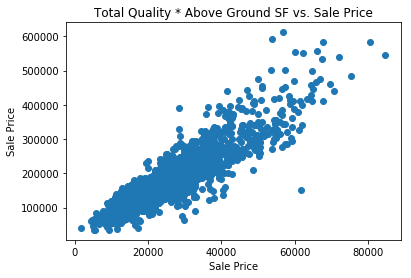

In [70]:
# Highest correlated interaction term would be 'Neighborhood Quality * Above Ground SF
plt.scatter(train['Total Quality'] * train['Above Ground SF'], train['SalePrice'])
plt.title('Total Quality * Above Ground SF vs. Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Sale Price');

Observation: strong linear relationship, one outlier

In [71]:
# Compare interaction to original correlations
print('Total Quality: ', np.corrcoef(train['Total Quality'], train['SalePrice'])[0][1])
print('Above Ground SF: ', np.corrcoef(train['Above Ground SF'], train['SalePrice'])[0][1])
print('Interaction Term: ', np.corrcoef(train['Total Quality'] * train['Above Ground SF'], train['SalePrice'])[0][1])

Total Quality:  0.8291142708550836
Above Ground SF:  0.728804626997077
Interaction Term:  0.8850208134006138


Observation: Interaction term has better correlation than either term alone

In [72]:
# Add interaction term to train and test
train['Total Quality * Above Ground SF'] = train['Total Quality'] * train['Above Ground SF']
test['Total Quality * Above Ground SF'] = test['Total Quality'] * test['Above Ground SF']

### Squared Features
***

In [73]:
# Looking for features where squaring the value increases the correlation
for feature in train._get_numeric_data().columns:
    og_corr = np.corrcoef(train[feature], train['SalePrice'])[0][1]
    sq_corr = np.corrcoef(train[feature]**2, train['SalePrice'])[0][1]
    if sq_corr > og_corr and abs(sq_corr - og_corr) > 0.09:
        print(feature, 'is better squared ({})'.format(abs(sq_corr - og_corr)))

Home Age is better squared (0.11826707475926607)
2nd Flr SF is better squared (0.0994410462612293)


In [74]:
train['Home Age^2'] = train['Home Age'] * train['Home Age']
test['Home Age^2'] = test['Home Age'] * test['Home Age']

In [75]:
train['2nd Flr SF^2'] = train['2nd Flr SF'] * train['2nd Flr SF']
test['2nd Flr SF^2'] = test['2nd Flr SF'] * test['2nd Flr SF']

### Dummies
***

In [76]:
# Get dummies for all categorical values
categorical_cols = [col for col in train.columns if train[col].dtype == 'O']

In [77]:
print('Number of Categorical Columns: ', len(categorical_cols))
categorical_cols

Number of Categorical Columns:  29


['MS SubClass',
 'MS Zoning',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Foundation',
 'Bsmt Exposure',
 'Heating',
 'Electrical',
 'Functional',
 'Garage Type',
 'Garage Finish',
 'Paved Drive',
 'Fence',
 'Misc Feature',
 'Sale Type']

In [78]:
categorical_cols.append('SalePrice')

In [79]:
# Get idea of columns to dummy...all columns where dummies have correlation greater than 0.35
dummie_series = abs(pd.get_dummies(train[categorical_cols]).corr()['SalePrice'])
dummie_series[dummie_series > 0.25].sort_values(ascending=False)

SalePrice               1.000000
Foundation_PConc        0.529992
Neighborhood_NridgHt    0.446793
Garage Finish_Unf       0.431918
Garage Finish_Fin       0.423200
Mas Vnr Type_None       0.420360
Bsmt Exposure_Gd        0.377454
Garage Type_Detchd      0.368992
MS SubClass_60          0.358667
Foundation_CBlock       0.358600
Garage Type_Attchd      0.356382
Sale Type_New           0.355493
Exterior 1st_VinylSd    0.342507
Exterior 2nd_VinylSd    0.340140
Mas Vnr Type_Stone      0.315585
Lot Shape_Reg           0.305197
Bsmt Exposure_No        0.294632
Paved Drive_Y           0.283841
MS Zoning_RM            0.279848
Lot Shape_IR1           0.274041
Roof Style_Hip          0.268640
Paved Drive_N           0.267762
Neighborhood_NoRidge    0.267159
Mas Vnr Type_BrkFace    0.265649
Neighborhood_StoneBr    0.260553
Roof Style_Gable        0.252649
Electrical_SBrkr        0.251835
Name: SalePrice, dtype: float64

In [80]:
# List of dummies to keep
dummies_keep = list(dummie_series[dummie_series > 0.25].sort_values(ascending=False).keys())
dummies_keep.remove('SalePrice')

In [81]:
dummies_keep

['Foundation_PConc',
 'Neighborhood_NridgHt',
 'Garage Finish_Unf',
 'Garage Finish_Fin',
 'Mas Vnr Type_None',
 'Bsmt Exposure_Gd',
 'Garage Type_Detchd',
 'MS SubClass_60',
 'Foundation_CBlock',
 'Garage Type_Attchd',
 'Sale Type_New',
 'Exterior 1st_VinylSd',
 'Exterior 2nd_VinylSd',
 'Mas Vnr Type_Stone',
 'Lot Shape_Reg',
 'Bsmt Exposure_No',
 'Paved Drive_Y',
 'MS Zoning_RM',
 'Lot Shape_IR1',
 'Roof Style_Hip',
 'Paved Drive_N',
 'Neighborhood_NoRidge',
 'Mas Vnr Type_BrkFace',
 'Neighborhood_StoneBr',
 'Roof Style_Gable',
 'Electrical_SBrkr']

In [82]:
# Create dummy DataFrame
dummy_train = pd.get_dummies(train)
dummy_test = pd.get_dummies(test)

In [83]:
# Change dummy DataFrame to contain only those columns in the dummy keep list that had significant correlation
dummy_train = dummy_train[dummies_keep]
dummy_test = dummy_test[dummies_keep]

In [84]:
# Add dummy DataFrame to train DataFrame
train_w_dum = train.join(dummy_train)
test_w_dum = test.join(dummy_test)

In [85]:
# Drop all remaining categorical columns
categorical_cols = train.dtypes[train.dtypes == 'object'].keys()
print("How many categorical columns am I dropping? ", len(categorical_cols))
train_w_dum.drop(columns = categorical_cols, inplace = True)
test_w_dum.drop(columns = categorical_cols, inplace = True)

How many categorical columns am I dropping?  29


In [86]:
# Compare size of train to test to find if there are missing dummy columns
print('Train Size: ', train_w_dum.shape)
print('Test Size: ', test_w_dum.shape)

Train Size:  (2022, 88)
Test Size:  (879, 87)


In [87]:
# Look at top 30 highest correlated features with new dummy variables
abs(train_w_dum.corr()['SalePrice']).sort_values(ascending=False).head(40)

SalePrice                          1.000000
Total Quality * Above Ground SF    0.885021
Total Quality                      0.829114
Overall Qual                       0.802094
Above Ground SF                    0.728805
Gr Liv Area                        0.719911
Exter Qual                         0.714292
Neighborhood Quality               0.713592
Kitchen Qual                       0.692597
Total Bsmt SF                      0.664496
Garage Area                        0.657729
1st Flr SF                         0.650123
Garage Cars                        0.649914
Baths                              0.648360
Bsmt Qual                          0.609237
Home Age                           0.572272
Year Remod/Add                     0.549242
Fireplace Qu                       0.540010
Full Bath                          0.538497
Foundation_PConc                   0.529992
Finished Basement                  0.522911
Mas Vnr Area                       0.518978
TotRms AbvGrd                   

Observations:
- Interaction terms is the most highly correlated
- New Neighborhood Quality is also highly correlated
- Some dummy variables that are highly correlated:
    - Foundation_PConc 
    - BsmtFin Type 1_GLQ
    - Garage Finish_Unf 
    - Garage Finish_Fin
    - Mas Vnr Type_None 
    - Bsmt Exposure_Gd 

### Save Data with Dummies

In [88]:
# Save cleaned datasets
train_w_dum.to_csv('../datasets/train_clean_dummies.csv')
test_w_dum.to_csv('../datasets/test_clean_dummies.csv')